In [434]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve

# Analisis de datos

In [435]:
#importamos librerías
import pandas as pd
import seaborn as sns

In [436]:
#Importamos los datos
DatosBanco = pd.read_csv("UniversalBank.csv")
DatosBanco.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [437]:
DatosBanco.drop(["ID","ZIP Code"],axis=1,inplace=True)
DatosBanco

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


Text(0.5, 1.0, 'Valores faltantes en la base de datos')

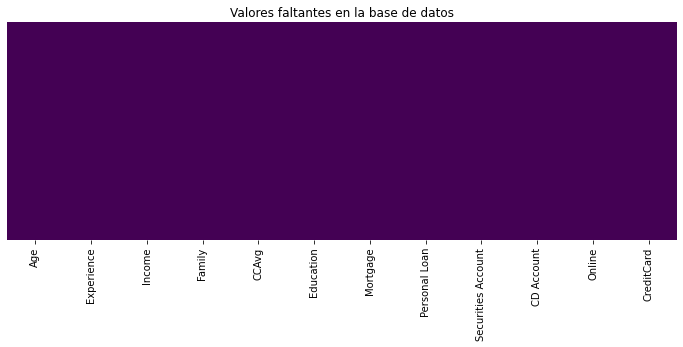

In [438]:
plt.figure(figsize = (12,4))
sns.heatmap(DatosBanco.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Valores faltantes en la base de datos')

In [439]:
#Como se puede ver en la gráfica anterior, no hay datos faltantes. Ahora exploramos nuestras variables para encontrar
#valores atípicos o ruido

<AxesSubplot:>

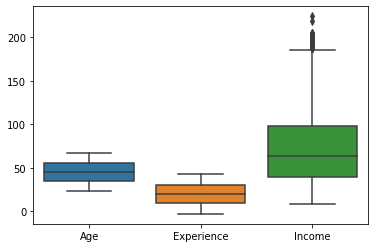

In [440]:
sns.boxplot(data=DatosBanco.iloc[:,0:3])

<AxesSubplot:>

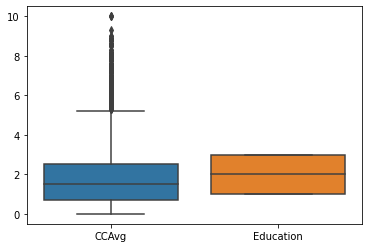

In [441]:
sns.boxplot(data=DatosBanco.iloc[:,4:6])

C:\Users\Lesli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lesli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lesli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='CreditCard', ylabel='Density'>

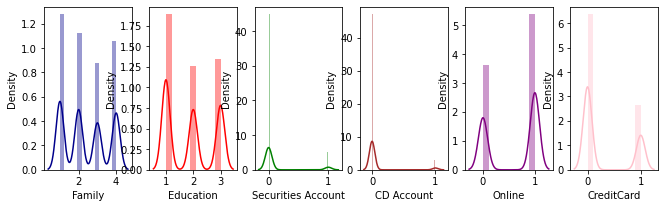

In [442]:
#Tenemos varias variables binarias o categóricas, graficamos su distribución para verificar que los valores estén en las diferentes
#categorías
fig,ax = plt.subplots(nrows=1,ncols=6,figsize=(11,3))
sns.distplot(DatosBanco.iloc[:,3], ax=ax[0],color='darkblue')
sns.distplot(DatosBanco.iloc[:,5], ax=ax[1], color='red')
sns.distplot(DatosBanco.iloc[:,8], ax=ax[2], color='green')
sns.distplot(DatosBanco.iloc[:,9], ax=ax[3], color='brown')
sns.distplot(DatosBanco.iloc[:,10], ax=ax[4], color='purple')
sns.distplot(DatosBanco.iloc[:,11], ax=ax[5], color='pink')

In [443]:
#Mediante el análisis de variables se encontró que la columna 'Experience', contie ne valores negativos, lo cual no tiene sentido 
#y probablemente se deba a algún error de dedo al capturar los datos, por lo que remplazaremos esos valores con el promedio de los 
#datos

In [444]:
#Calculamos el promedio
mean = DatosBanco.Experience.mean()
mean

20.1046

In [445]:
#Remplazamos los valores lt(0), lower than 0 con el promedio
DatosBanco.Experience[DatosBanco.Experience.lt(0)] = mean

C:\Users\Lesli\AppData\Local\Temp\ipykernel_27452\1932984640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DatosBanco.Experience[DatosBanco.Experience.lt(0)] = mean


In [446]:
#Verificamos en algunos renglones que si se hayan remplazado los valores
DatosBanco.iloc[89]

Age                    25.0000
Experience             20.1046
Income                113.0000
Family                  4.0000
CCAvg                   2.3000
Education               3.0000
Mortgage                0.0000
Personal Loan           0.0000
Securities Account      0.0000
CD Account              0.0000
Online                  0.0000
CreditCard              1.0000
Name: 89, dtype: float64

In [447]:
X = DatosBanco.iloc[:,[0,1,2,3,4,5,6,8,9,10,11]]
y = DatosBanco.iloc[:,7]
X.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0


In [448]:
y.head(3)

0    0
1    0
2    0
Name: Personal Loan, dtype: int64

In [449]:
#Ahora estudiamos sus correlaciones
DatosBanco.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977008,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977008,1.000000,-0.049054,-0.045488,-0.048708,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.055269,-0.049054,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045488,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048708,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018097,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013378,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014045,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000462,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005502,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [450]:
#sns.pairplot(DatosBanco, hue='Personal Loan' )
#plt.show()

# Selección de características

In [451]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# prueba chi-cuadrada compara modelo con observaciones, datos aleatrios, mutuamente exclusivos

In [452]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

In [453]:
X_new[0,:]

array([49.,  0.])

In [454]:
best = SelectKBest(chi2, k=5).fit(X,y)
best.get_feature_names_out(input_features=X.columns.values[0:])

array(['Income', 'CCAvg', 'Education', 'Mortgage', 'CD Account'],
      dtype=object)

In [455]:
#De acuerdo con la prueba de Chi cuadrada, las variables más importantes serían Income y Mortgage

In [456]:
DatosBanco.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0


In [457]:
DatosBanco.iloc[:,[0,1,3,8,10,11]]

,Age,Experience,Family,Securities Account,Online,CreditCard
0,25,1.0,4,1,0,0
1,45,19.0,3,1,0,0
2,39,15.0,1,0,0,0
3,35,9.0,1,0,0,0
4,35,8.0,4,0,0,1
...,...,...,...,...,...,...
4995,29,3.0,1,0,1,0
4996,30,4.0,4,0,1,0
4997,63,39.0,2,0,0,0
4998,65,40.0,3,0,1,0


# Datos de entrenamiento 

In [458]:
#X = DatosBanco.drop('Personal Loan',axis=1)
#X = DatosBanco.iloc[:,[0,1,3,8,10,11]] #X = datos_df.drop('Personal Loan',axis=1)
X = DatosBanco.iloc[:,[2,4,5,6,9]]
y = DatosBanco.iloc[:,7]

#Dividimos nuestros datos en entrenamiento y prueba:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

print(f"No. of muestras de entrenamiento: {X_train.shape[0]}")
print(f"No. of muestras de prueba: {X_test.shape[0]}")


No. of muestras de entrenamiento: 3500
No. of muestras de prueba: 1500


In [459]:
X_train.head(3)

,Income,CCAvg,Education,Mortgage,CD Account
3520,29,1.3,2,0,0
304,22,0.1,1,0,0
3818,102,2.3,3,0,0


# SVM

In [460]:
from sklearn.svm import SVC

In [461]:
SVM = SVC(degree=3, kernel="poly")
SVM.fit(X_train,y_train)

In [483]:
predic = SVM.predict(X_test)

In [484]:
accuracy_score(y_test, predic)

0.914

In [462]:
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1356
           1       0.86      0.12      0.22       144

    accuracy                           0.91      1500
   macro avg       0.89      0.56      0.59      1500
weighted avg       0.91      0.91      0.88      1500



In [463]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

C:\Users\Lesli\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


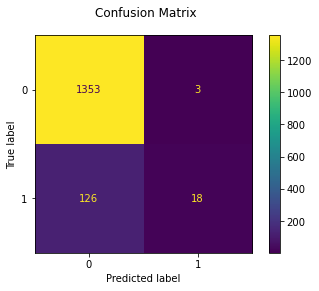

In [464]:
fig = plot_confusion_matrix(SVM, X_test, y_test, display_labels=SVM.classes_)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

# Gradient Boosting

In [465]:
from sklearn.ensemble import GradientBoostingClassifier

In [466]:
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1)

In [467]:
GBC.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [468]:
predic = GBC.predict(X_test)

In [469]:
accuracy_score(y_test, predic)

0.972

In [470]:
GBC.predict_proba(X_test)

array([[9.99949298e-01, 5.07024473e-05],
       [8.14164498e-01, 1.85835502e-01],
       [1.82758010e-03, 9.98172420e-01],
       ...,
       [9.96713970e-01, 3.28602979e-03],
       [9.99949298e-01, 5.07024473e-05],
       [9.90567455e-01, 9.43254458e-03]])

In [471]:
pd.crosstab(y_test, predic, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1348,8,1356
1,34,110,144
All,1382,118,1500


In [472]:
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1356
           1       0.93      0.76      0.84       144

    accuracy                           0.97      1500
   macro avg       0.95      0.88      0.91      1500
weighted avg       0.97      0.97      0.97      1500



C:\Users\Lesli\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


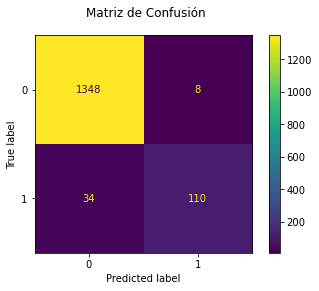

In [473]:
fig = plot_confusion_matrix(GBC, X_test, y_test, display_labels=GBC.classes_)
fig.figure_.suptitle("Matriz de Confusión")
plt.show()

# Naive Bayes

In [474]:
from sklearn.naive_bayes import GaussianNB

In [487]:
NB = GaussianNB()

In [488]:
NB.fit(X_train, y_train)

GaussianNB()

In [489]:
predic = NB.predict(X_test)
print('la probabilidad de acierto \n')
print((np.sum(predic == y_test)/len(predic))*100)

la probabilidad de acierto 

87.53333333333333


In [490]:
accuracy_score(y_test, predic)

0.8753333333333333

In [478]:
NB.predict_proba(X_test)

array([[9.99971989e-01, 2.80109068e-05],
       [7.58011273e-01, 2.41988727e-01],
       [1.25178596e-06, 9.99998748e-01],
       ...,
       [9.99963992e-01, 3.60079610e-05],
       [9.99973940e-01, 2.60595467e-05],
       [9.97376059e-01, 2.62394110e-03]])

In [479]:
pd.crosstab(y_test, predic, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1231,125,1356
1,62,82,144
All,1293,207,1500


In [480]:
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1356
           1       0.40      0.57      0.47       144

    accuracy                           0.88      1500
   macro avg       0.67      0.74      0.70      1500
weighted avg       0.90      0.88      0.89      1500



C:\Users\Lesli\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


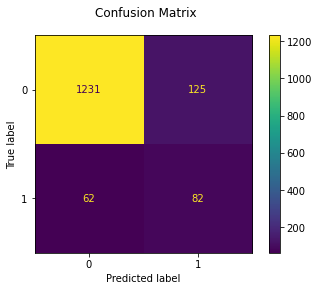

In [481]:
fig = plot_confusion_matrix(NB, X_test, y_test, display_labels=NB.classes_)
fig.figure_.suptitle("Confusion Matrix")
plt.show()